In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Clustering With Nonstandard Data

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Nq5rzap4neDRDlcR82PdIFmXbZTb0rfp?usp=sharing)

In [2]:
# Load Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Preprocess the data: flatten the images and scale the pixel values to [0, 1]
train_images = train_images.reshape((train_images.shape[0], -1))
train_images = train_images.astype('float32') / 255

In [4]:
# Fit KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(train_images)

KMeans(n_clusters=10, random_state=42)

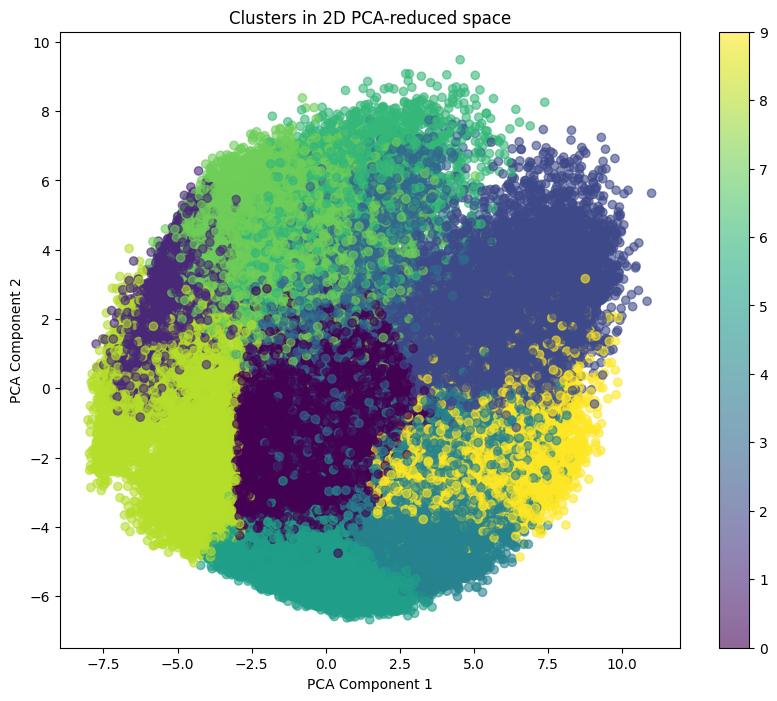

In [5]:
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(train_images)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, alpha=0.6, cmap='viridis')
plt.colorbar(scatter)
plt.title('Clusters in 2D PCA-reduced space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()